$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 5 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
# I saved my prapared data from my last assignment

In [4]:
X_train = pd.read_csv(r'E:\ITI AI&ML\13.Machine Learning 1\labs\Lab 4\X_train.csv')
y_train = pd.read_csv(r'E:\ITI AI&ML\13.Machine Learning 1\labs\Lab 4\y_train.csv')
X_test = pd.read_csv(r'E:\ITI AI&ML\13.Machine Learning 1\labs\Lab 4\X_test.csv')
y_test = pd.read_csv(r'E:\ITI AI&ML\13.Machine Learning 1\labs\Lab 4\y_test.csv')

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [5]:
# Initialize the Decision Tree Classifier with initial parameters
Decision_Tree = DecisionTreeClassifier(random_state=1234)

In [6]:
Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

In [7]:
y_pred = Decision_Tree.predict(X_test)

In [8]:
y_pred

array([2, 1, 3, ..., 2, 1, 1], dtype=int64)

In [9]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6789

In [10]:
precision = precision_score(y_test, y_pred, average = 'weighted')
print("Precision:", precision)

Precision: 0.6786307923791606


In [11]:
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Recall:", recall)

Recall: 0.6789


In [12]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.6787402945641197


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3842 1707  248]
 [1798 7692 1168]
 [ 241 1260 2044]]


## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

In [14]:
"""
Regularization techniques like constraining the max_depth parameter in a decision tree
can indeed help prevent overfitting and improve the model's generalization performance. 
By limiting the depth of the tree, you're effectively reducing its complexity
"""
print()

In [15]:
DT_regularized = DecisionTreeClassifier(max_depth=5, random_state=1234)

In [16]:
DT_regularized.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [17]:
y_pred_regularized = DT_regularized.predict(X_test)

In [18]:
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
precision_regularized = precision_score(y_test, y_pred_regularized , average = 'weighted')
recall_regularization = recall_score(y_test,y_pred_regularized ,average = 'weighted' )
f1_regularized = f1_score(y_test, y_pred_regularized, average = 'weighted')
conf_matrix_regularized = confusion_matrix(y_test, y_pred_regularized)

In [19]:
print("Regularized Model Evaluation Metrics:")
print("Accuracy:", accuracy_regularized)
print("Precision:", precision_regularized)
print("Recall:", recall_regularization)
print("F1 Score:", f1_regularized)
print("Confusion Matrix:")
print(conf_matrix_regularized)

Regularized Model Evaluation Metrics:
Accuracy: 0.6562
Precision: 0.7068401108388703
Recall: 0.6562
F1 Score: 0.6572050087503043
Confusion Matrix:
[[4524  655  618]
 [2738 5805 2115]
 [ 205  545 2795]]


## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [21]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4]       
}

In [22]:
DT = DecisionTreeClassifier(random_state=1234)

In [23]:
scorer = make_scorer(f1_score)

In [24]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(DT, param_distributions=param_grid, n_iter=10, scoring=scorer, random_state=1234)

In [25]:
random_search.fit(X_train, y_train)

c:\Users\bios\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\bios\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bios\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bios\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._sco

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=1234,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [26]:
best_params = random_search.best_params_

In [27]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


In [28]:
# Evaluate the model with the best hyperparameters on the test data
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [30]:
# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average= None)
recall_best = recall_score(y_test, y_pred_best, average= None )
f1_best = f1_score(y_test, y_pred_best, average= None)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

In [31]:
print("Best Model Evaluation Metrics:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)
print("Confusion Matrix:")
print(conf_matrix_best)

Best Model Evaluation Metrics:
Accuracy: 0.69145
Precision: [0.6585404  0.77667141 0.56409682]
Recall: [0.72692772 0.66597861 0.7100141 ]
F1 Score: [0.69104624 0.71707835 0.62869989]
Confusion Matrix:
[[4214 1215  368]
 [1983 7098 1577]
 [ 202  826 2517]]


## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?

`Q` Can you intrepet the importance of the few top features?

In [32]:
# Extract feature importances from the best model
feature_importances = best_model.feature_importances_

In [33]:
# Get the names of the features
feature_names = X_train.columns

In [34]:
# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

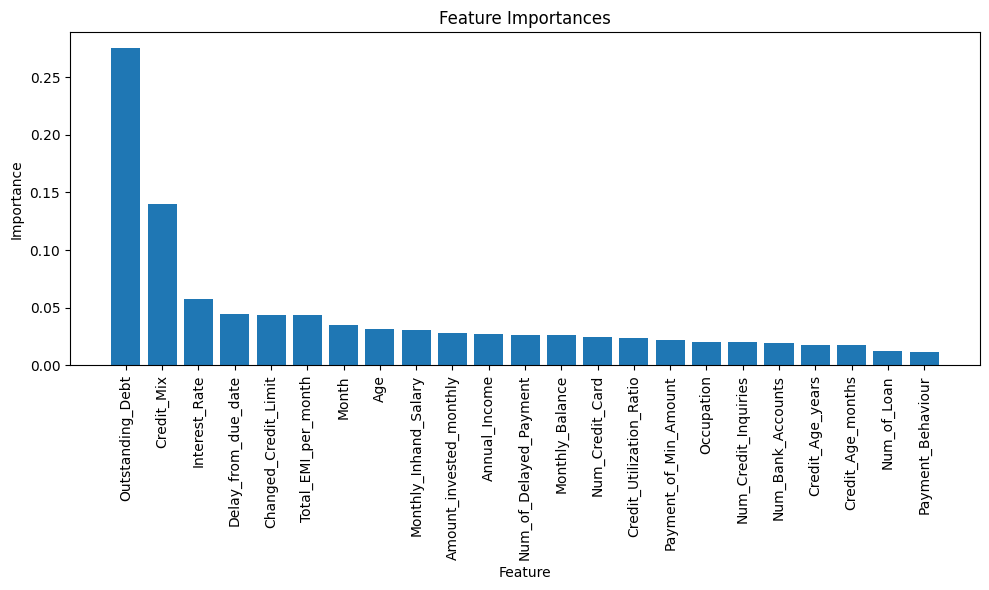

In [35]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Higher importances imply that those features are more influential in determining the outcome
# you can interpret the importance of the top features by understanding their contribution to the model's predictions

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [39]:
# Use the best model obtained from hyperparameter tuning
final_model = best_model

# Predict using the final model on the test data
y_pred_final = final_model.predict(X_test)

# Calculate evaluation metrics for the final model
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final,  average = None)
recall_final = recall_score(y_test,y_pred_final, average= None)
f1_final = f1_score(y_test, y_pred_final,  average = None)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)

# Display the evaluation metrics for the final model
print("Final Model Evaluation Metrics:")
print("Accuracy:", accuracy_final)
print("Precision:", precision_final)
print("Recall:", recall_final)
print("F1 Score:", f1_final)
print("Confusion Matrix:")
print(conf_matrix_final)


Final Model Evaluation Metrics:
Accuracy: 0.69145
Precision: [0.6585404  0.77667141 0.56409682]
Recall: [0.72692772 0.66597861 0.7100141 ]
F1 Score: [0.69104624 0.71707835 0.62869989]
Confusion Matrix:
[[4214 1215  368]
 [1983 7098 1577]
 [ 202  826 2517]]


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$